<a href="https://colab.research.google.com/github/Sonypriyasonu/Staffing-Stability-Prognosis/blob/main/Staffing_stability_prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classification of seven Algorithms to predict the best model for Employee turnover**
This project aims to predict who will leave the company. In this analysis, we are going to use the fictional data called HR Analytics Employee Attrition & Performance created by IBM data scientists.

* **Age:** Age of the Employee
* **Attrition:** Employee who stayed: 0 , Employee who leave: 1
* **BusinessTravel:** 'Travel_Rarely' 'Travel_Frequently' 'Non-Travel'
* **DailyRate:** Daily Rate of Employee
* **Department:** 'Sales' 'Research & Development' 'Human Resources'
* **DistanceFromHome:** Distance from home from work for each Employee
* **Education:** 1:Below College, 2 :College, 3:Bachelor, 4 ;Master, 5:Doctor
* **EducationFiel:** 'Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree' 'Human Resources'
* **EnvironmentSatisfaction:** 1: Low, 2 :Medium, 3 :High, 4 :Very High
* **Gender:** Female or Male
* **HourlyRate:** Hourly Rate of Employee
* **JobInvolvement:** 1: Low, 2 :Medium, 3 :High, 4 :Very High JobLevel
* **JobRole:** ‘Sales Executive’ ‘Research Scientist’ ‘Laboratory Technician’ ‘Manufacturing Director’ ‘Healthcare Representative’ ‘Manager’
‘Sales Representative’ ‘Research Director’ ‘Human Resources’
* **JobSatisfaction:** 1: Low, 2 :Medium, 3 :High, 4 :Very High
* **MaritalStatus:** ‘Single’ ‘Married’ ‘Divorced’
* **MonthlyIncome:** Montly income of Employe between 2094 and 26999.
MonthlyRate
* **NumCompaniesWorked :** Number of Companies for the employee work before the current one.
* **Over18 :** 'Y'
* **OverTime :** v
* **PercentSalaryHike :** Percentage of Salary increase between %11-%25.
* **PerformanceRating :** 1 :Low, 2 :Good, 3 :Excellent, 4 :Outstanding
* **RelationshipSatisfaction:** 1: Low, 2 :Medium, 3 :High, 4 :Very High
* **StandardHours :** Standard work hour for each employee: 80 Hours
* **StockOptionLevel :** It categorized from 0 to 3 indicate the stock level of employee
* **TotalWorkingYears :** Employee's total working years and it varies between 0 to 40 years.
* **TrainingTimesLastYear :** Employee's training time in the last year.
* **WorkLifeBalance:** 1 :Bad, 2 :Good, 3 :Better, 4 :Best
* **YearsAtCompany :** Employess's total working year at the company and it varies between 0 to 40 years.
* **YearsInCurrentRole :** Employee's current position at the company and it varies between 0 to 18 years.
* **YearsSinceLastPromotion:** The time the employee get the last promation and it varies between 0 to 15 years.
* **YearsWithCurrManager:** The time for time employee working with current manager and it varies between 0 to 17 years.



## **Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataset = pd.read_csv("Training set_Human_Resources.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## **Data Preprocessing**

In [ ]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dataset.tail()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1465,36,0,884,23,2,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,0,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,0,155,4,3,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,0,1023,2,3,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0
1469,34,0,628,8,3,2068,2,82,4,2,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
dataset.shape

(1470, 53)

### **Check for NULL values**

In [4]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

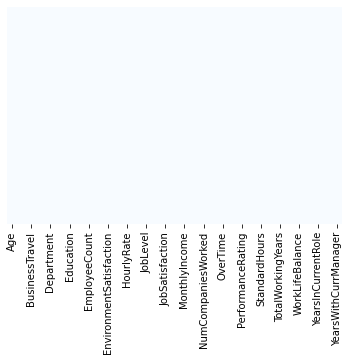

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

###  **Statistical Analysis of the Dataset**

In [ ]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **Preliminary Data Visualization**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

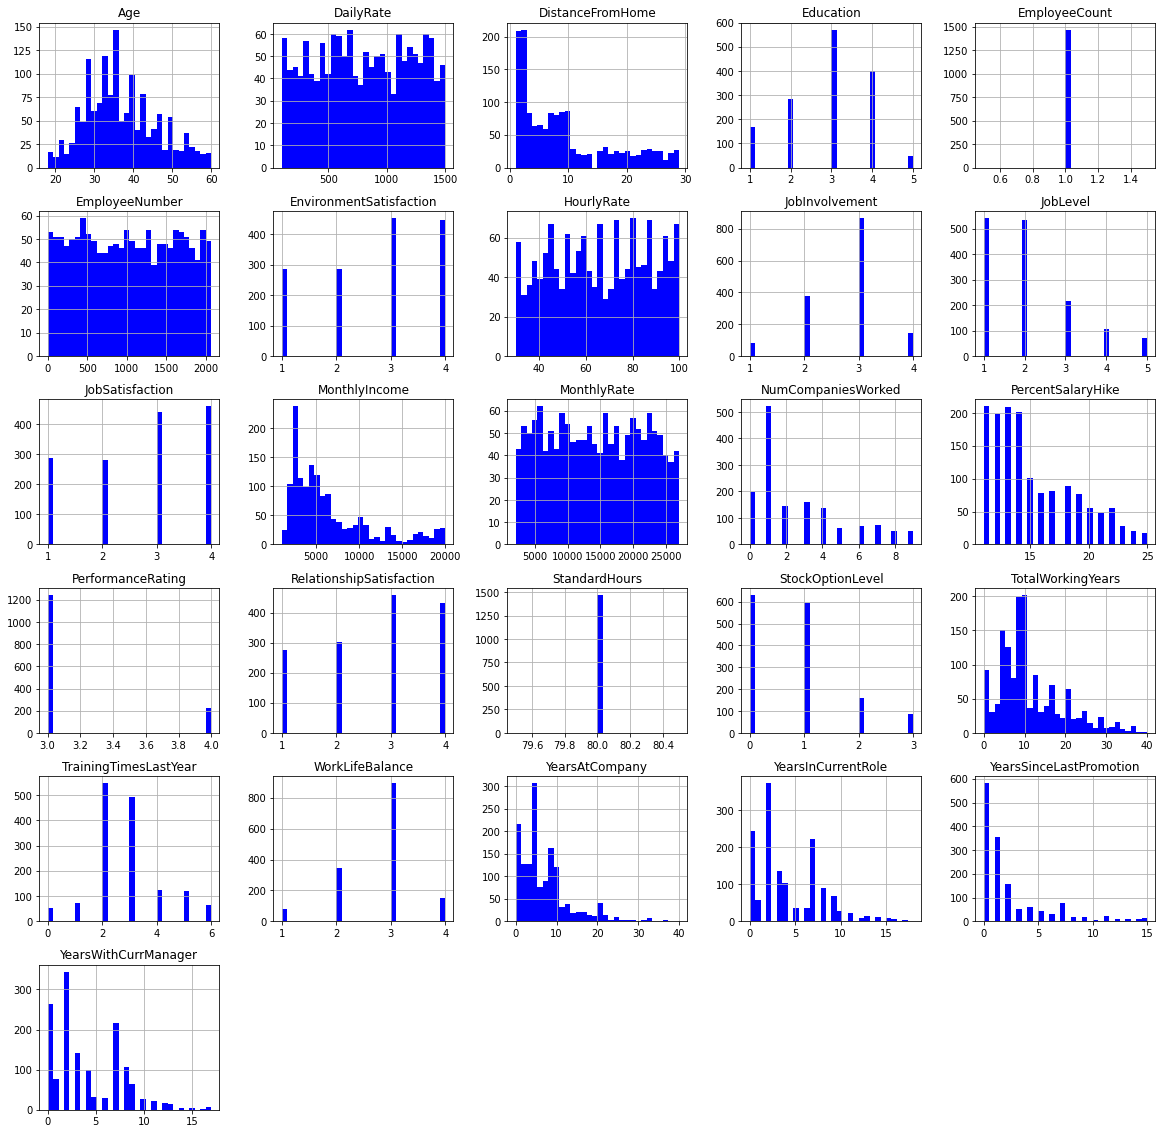

In [ ]:
dataset.hist(bins = 30, figsize = (20,20), color = 'b')

In [5]:
dataset['Attrition_ind'] = 0
dataset.loc[dataset['Attrition'] == 'Yes', 'Attrition_ind'] = 1
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [6]:
data_main = dataset.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
data_main.head()
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [7]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


In [8]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
gender_dict = data_main["Gender"].value_counts()
gender_dict

Male      882
Female    588
Name: Gender, dtype: int64

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

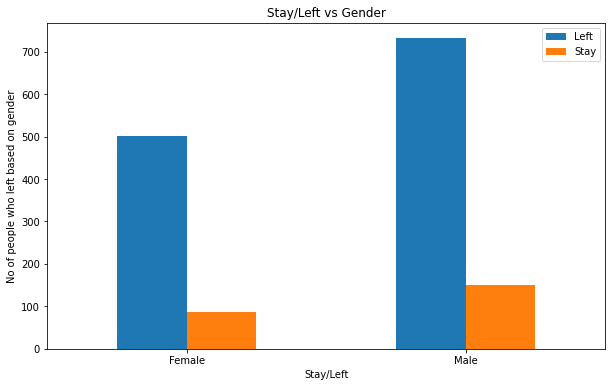

In [10]:
#Create a plot for crosstab

pd.crosstab(data_main['Gender'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Count of different Business Travel'}>

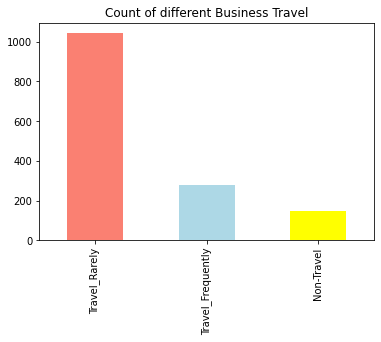

In [ ]:
data_main['BusinessTravel'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Business Travel")

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

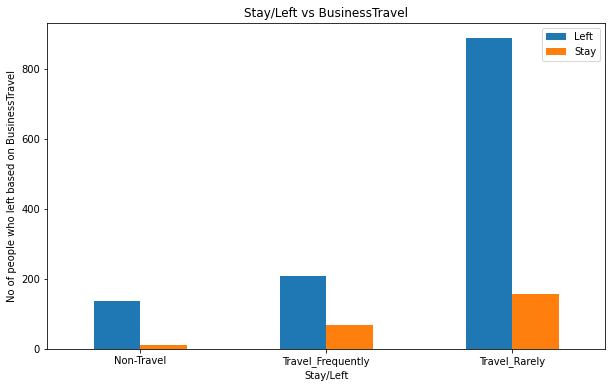

In [ ]:
#Create a plot for crosstab

pd.crosstab(data_main['BusinessTravel'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs BusinessTravel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on BusinessTravel")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Count of different Depatments'}>

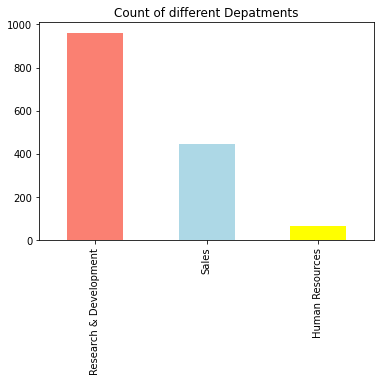

In [ ]:
data_main['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Depatments")

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

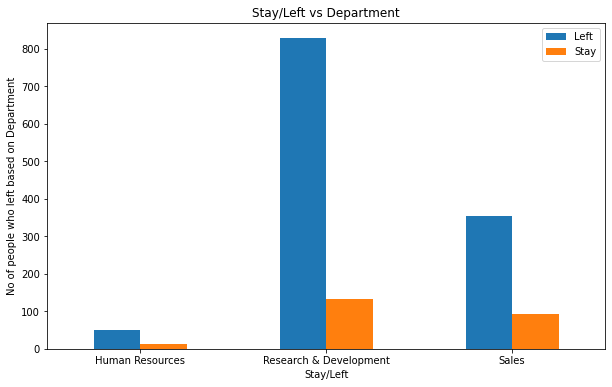

In [ ]:
#Create a plot for crosstab

pd.crosstab(data_main['Department'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Count of different Job Roles'}>

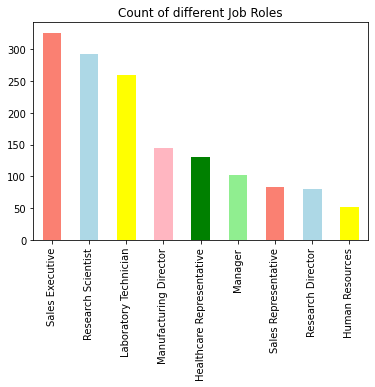

In [ ]:
data_main['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue','yellow', 'lightpink', 'green', 'lightgreen'],title="Count of different Job Roles")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

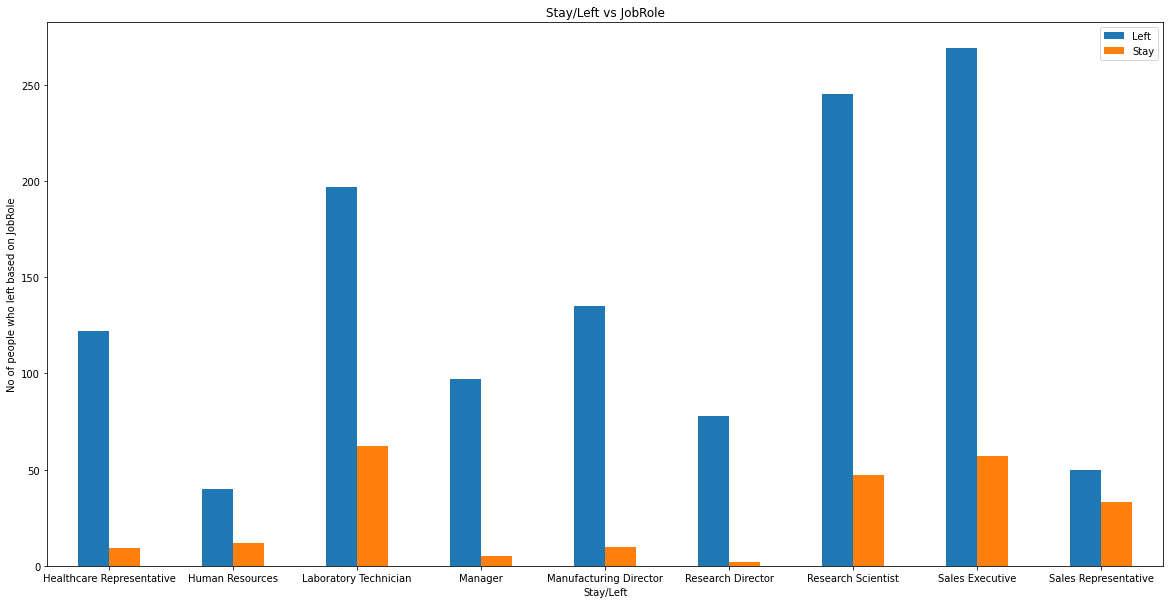

In [ ]:
#Create a plot for crosstab

pd.crosstab(data_main['JobRole'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs JobRole")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on JobRole")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot:title={'center':'Count of different Marital Status'}>

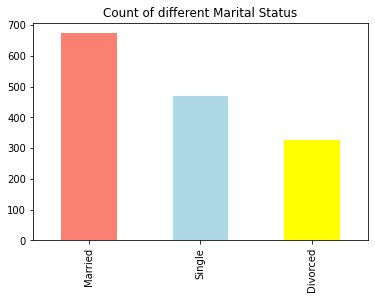

In [ ]:
data_main['MaritalStatus'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Marital Status")

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

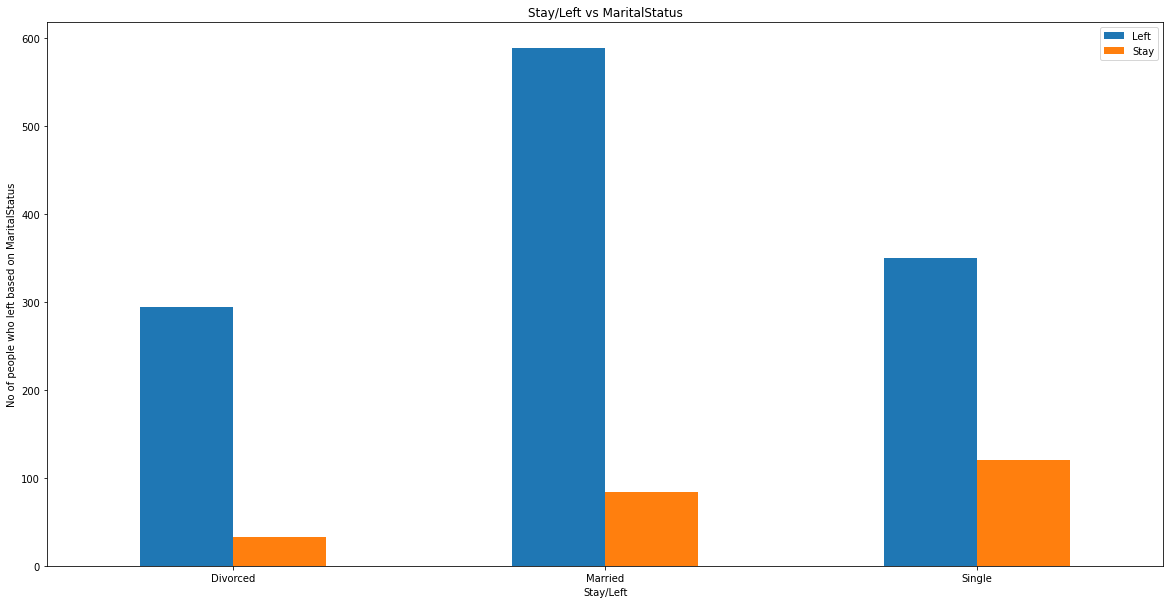

In [ ]:
#Create a plot for crosstab

pd.crosstab(data_main['MaritalStatus'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on MaritalStatus")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Age', ylabel='count'>

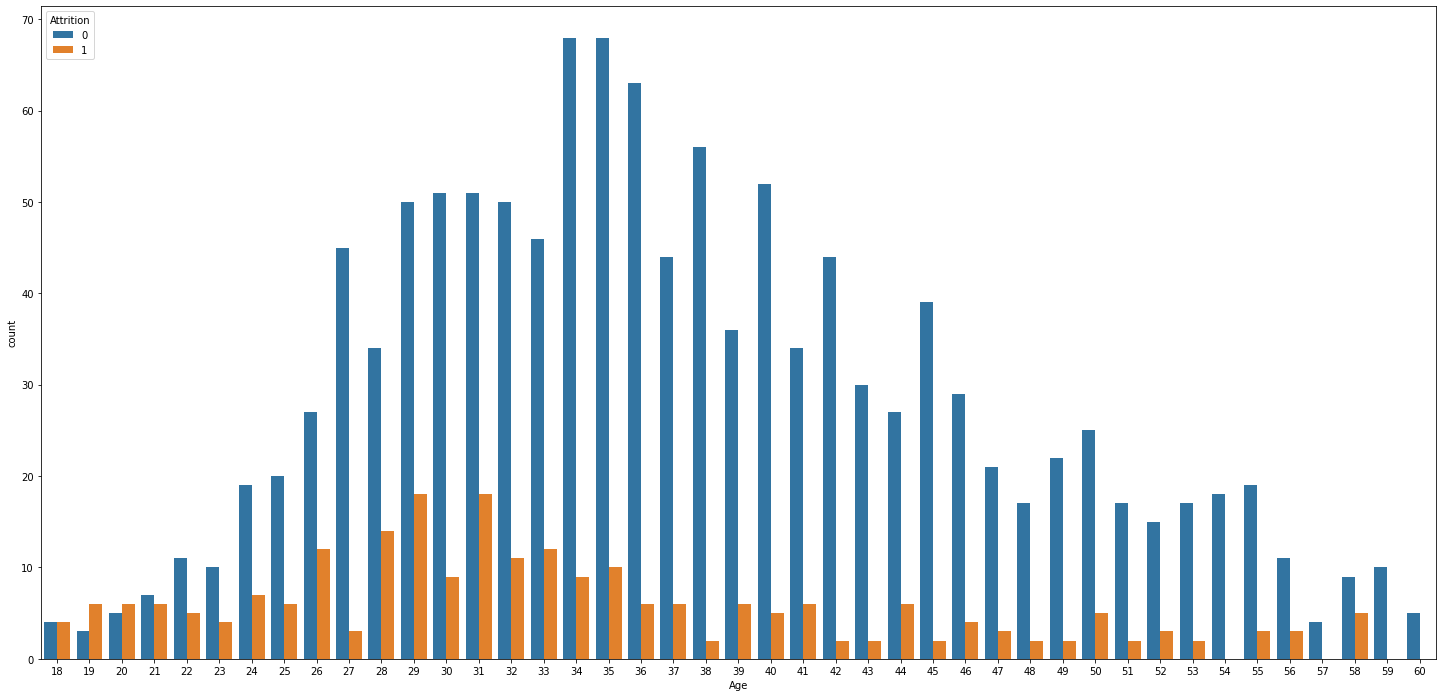

In [ ]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data_main)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

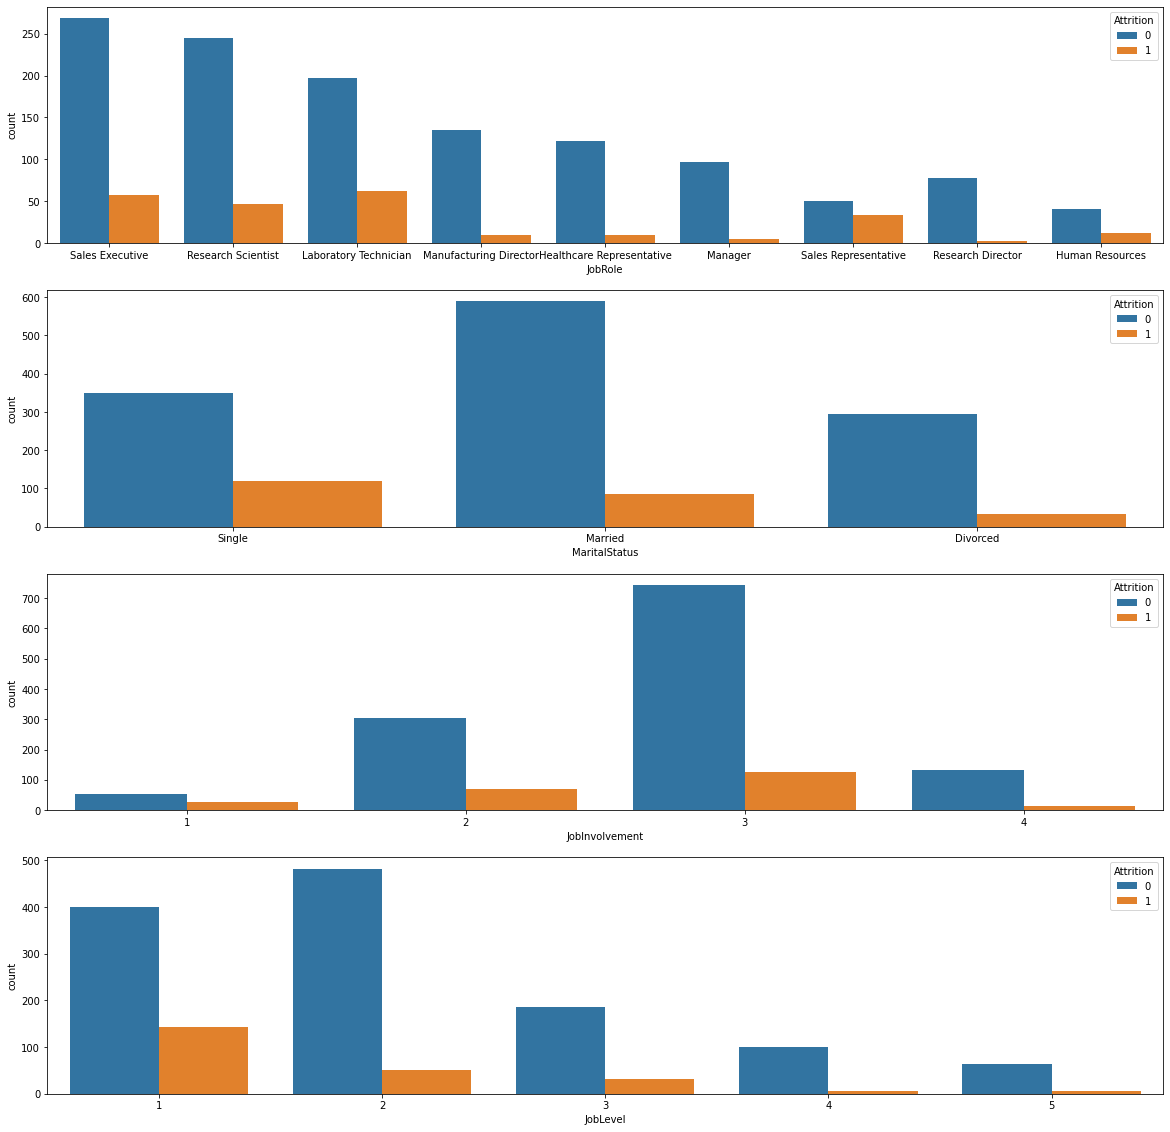

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data_main)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data_main)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data_main)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data_main)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 

In [ ]:
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
left_df        = dataset[dataset['Attrition'] == 1]
stayed_df      = dataset[dataset['Attrition'] == 0]

Text(0.5, 0, 'Distance From Home')

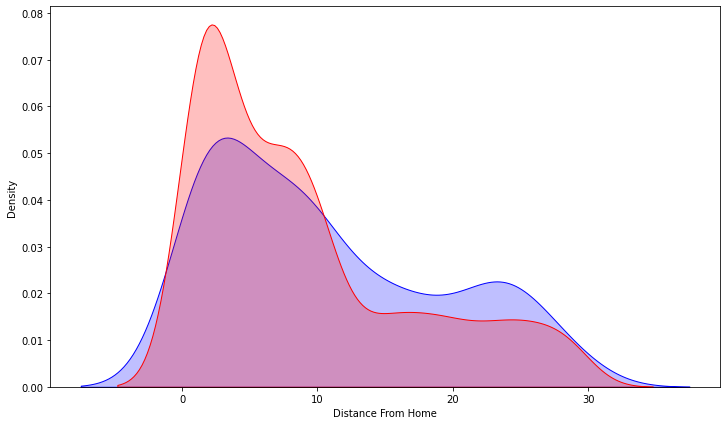

In [ ]:
# Its DistanceFromHome vs stay/left


plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Distance From Home')

Text(0.5, 0, 'Years With Current Manager')

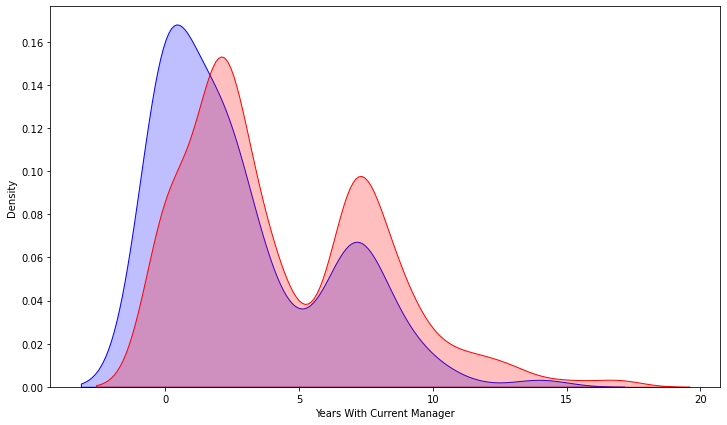

In [ ]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Years With Current Manager')

Text(0.5, 0, 'Total Working Years')

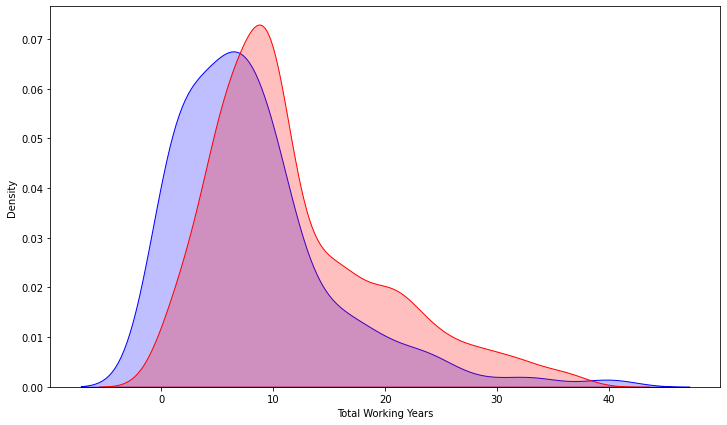

In [ ]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], fill = True, label = 'Employees who left', color = 'b')
sns.kdeplot(stayed_df['TotalWorkingYears'], fill = True, label = 'Employees who Stayed', color = 'r')

plt.xlabel('Total Working Years')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

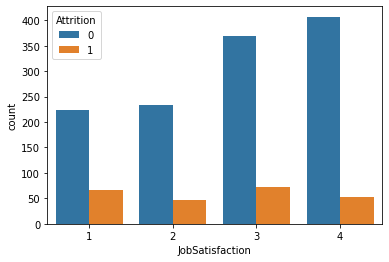

In [ ]:
# Its JobSatisfaction vs stay/left
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = data_main)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

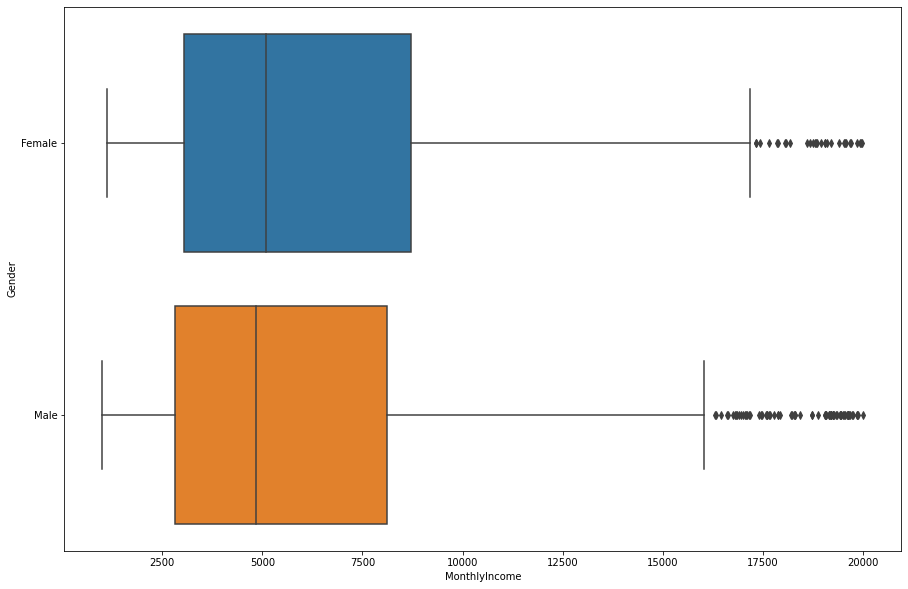

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data_main)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

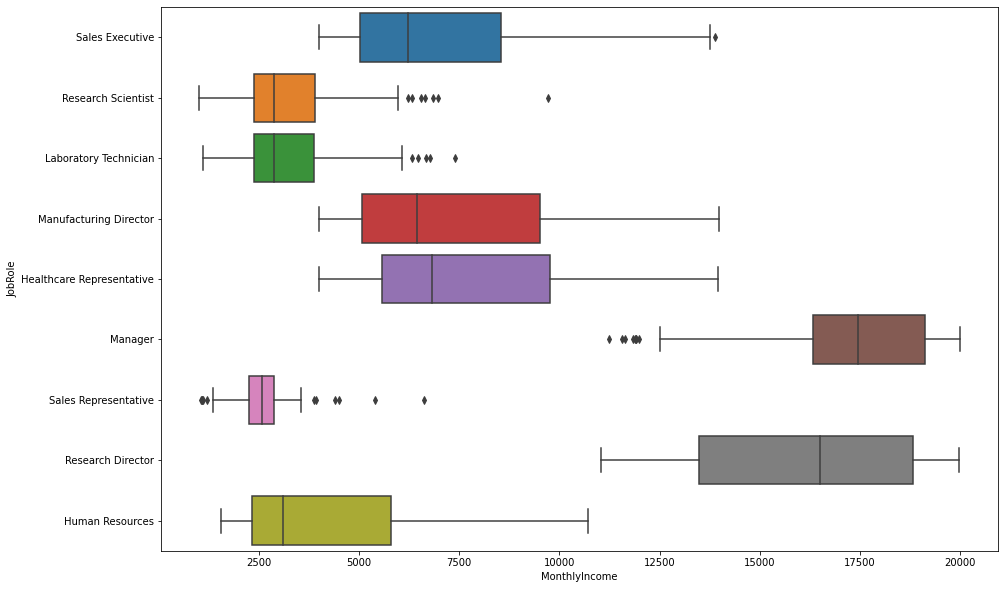

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data_main)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

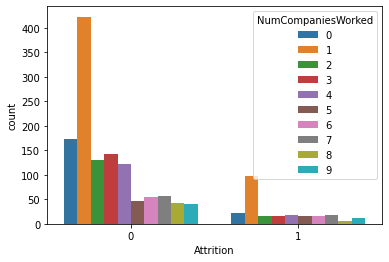

In [ ]:
# Its NumCompaniesWorked vs stay/left
sns.countplot(x = 'Attrition',hue='NumCompaniesWorked',data=data_main)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

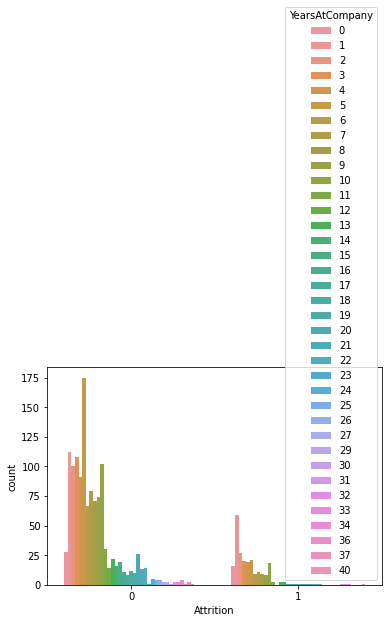

In [ ]:
# Its YearsAtCompany vs stay/left
sns.countplot(x = 'Attrition',hue='YearsAtCompany',data=data_main)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

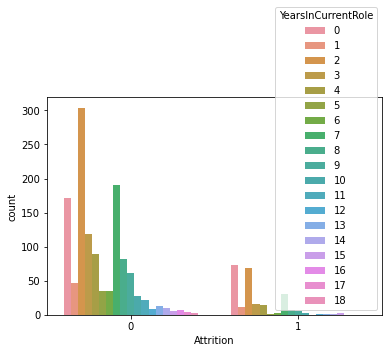

In [ ]:
# Its YearsInCurrentRole vs stay/left
sns.countplot(x = 'Attrition',hue='YearsInCurrentRole',data=data_main)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

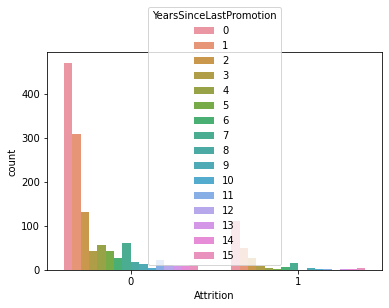

In [ ]:
# Its YearsSinceLastPromotion vs stay/left
sns.countplot(x = 'Attrition',hue='YearsSinceLastPromotion',data=data_main)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

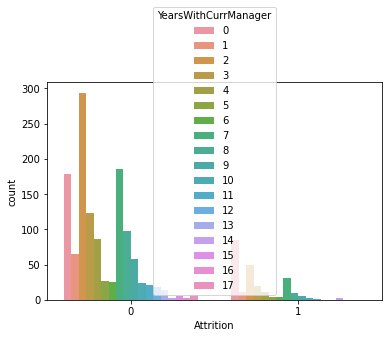

In [ ]:
# Its YearsWithCurrManager vs stay/left
sns.countplot(x = 'Attrition',hue='YearsWithCurrManager',data=data_main)

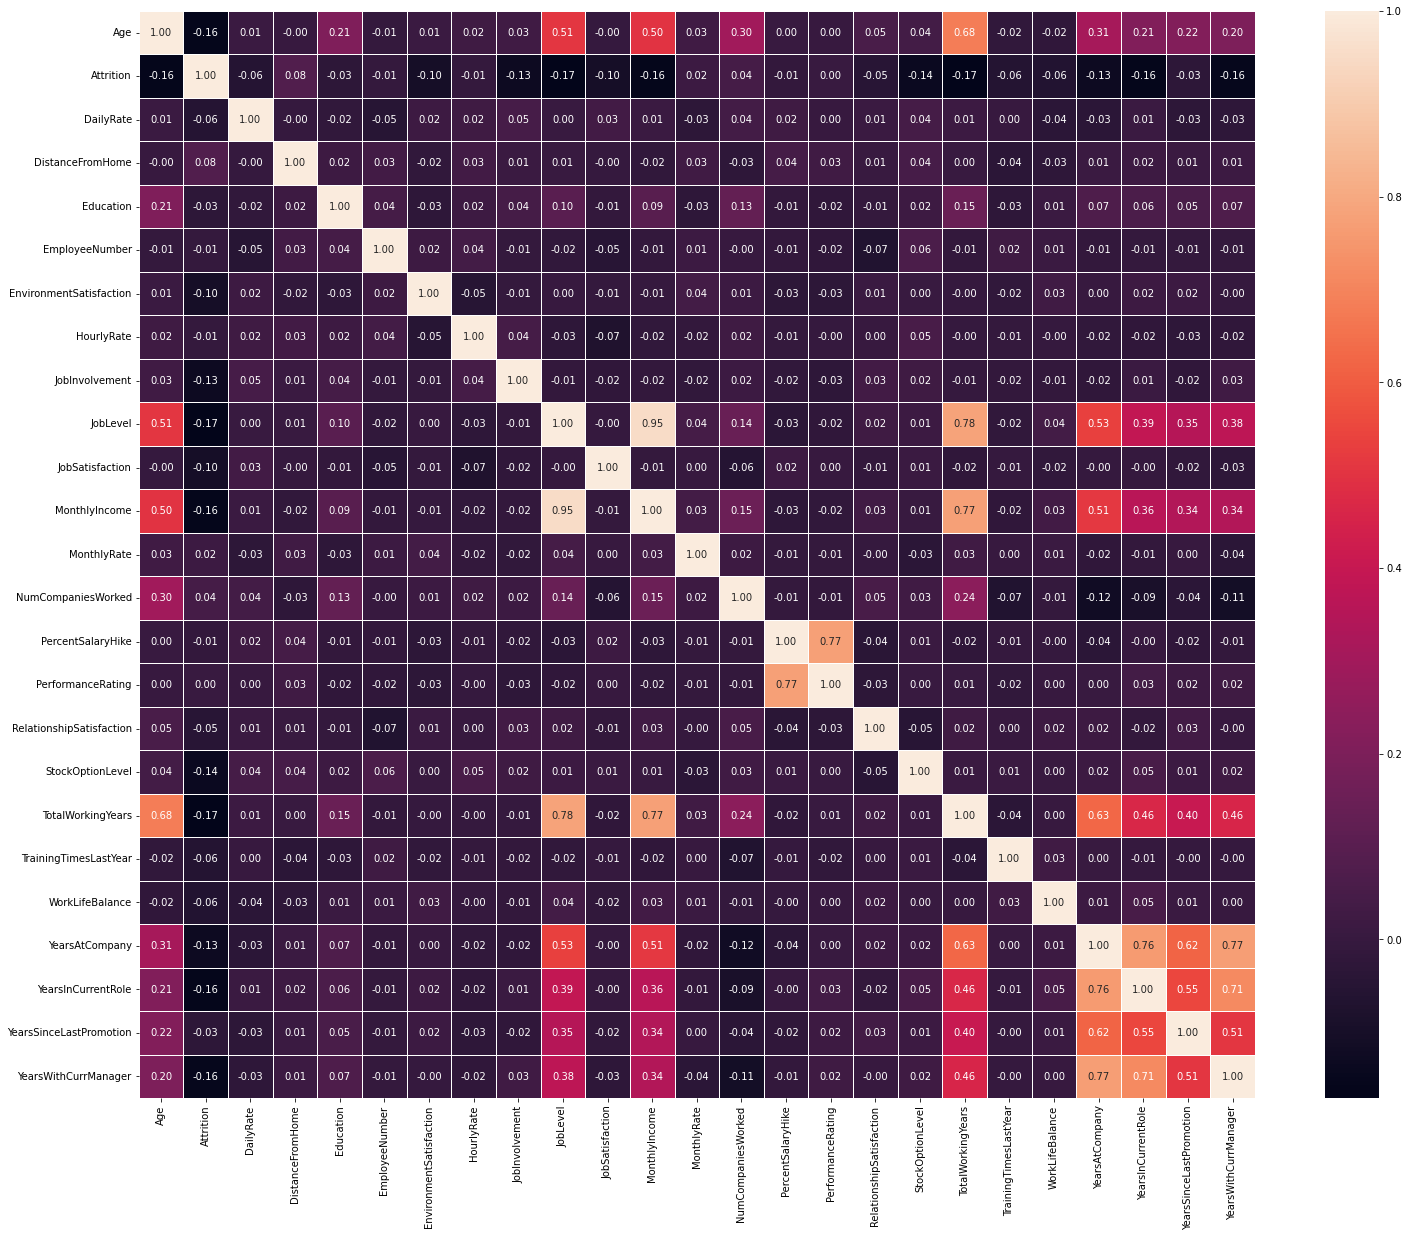

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=data_main.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [11]:
dataset = pd.get_dummies(data_main)
# from sklearn.preprocessing import OneHotEncoder
# oneh = OneHotEncoder(handle_unknown="ignore")
# features = data_main.columns
# oneh.fit(data_main[features])
dataset.head()
dataset.shape

(1470, 53)

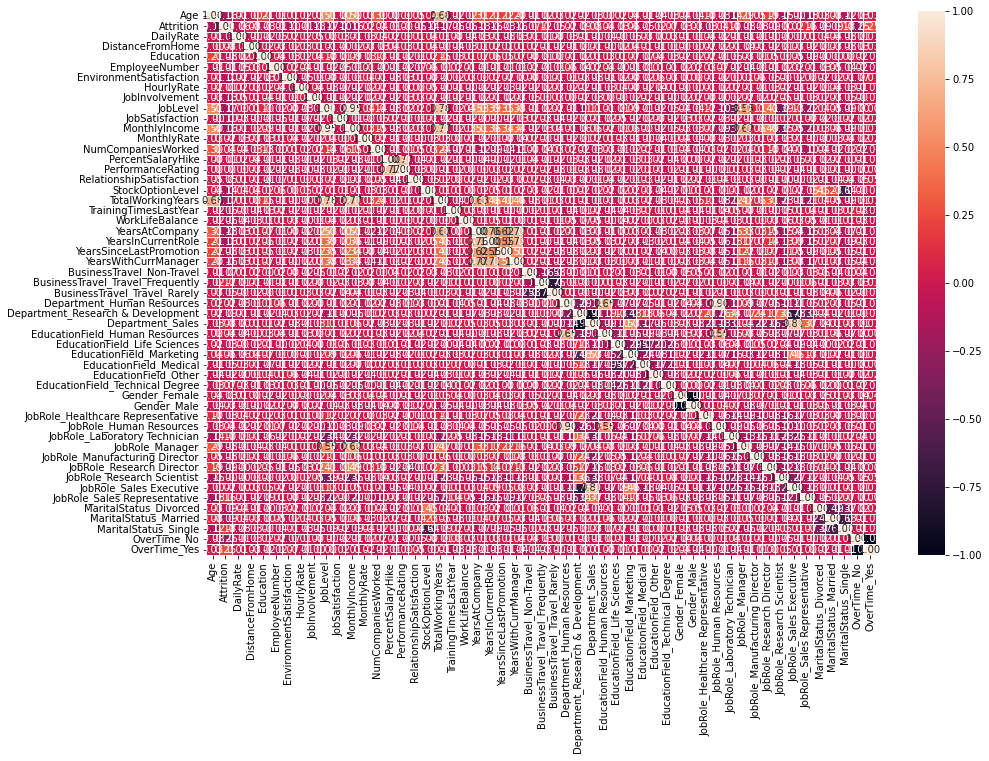

In [12]:
# Let's make our correlation matrix visual
corr_matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

## **Model Developement**

In [13]:
x=dataset.drop('Attrition',axis=1)
x.to_csv("processed HR.csv")
y=dataset.Attrition
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=4)
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
468,52,956,6,2,630,4,78,3,2,1,...,0,0,1,0,0,1,0,0,0,1
49,35,1229,8,1,63,4,36,4,1,4,...,0,0,0,0,0,0,1,0,1,0
524,34,1442,9,3,717,4,46,2,3,2,...,0,0,0,0,0,0,0,1,1,0
1101,32,824,5,2,1555,4,67,2,2,2,...,0,0,1,0,0,0,1,0,1,0
986,39,1498,21,4,1390,1,44,2,2,4,...,0,0,0,1,0,0,1,0,0,1


### **Logistic Regression Model**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logisticregressionmodel = LogisticRegression()
logisticregressionmodel.fit(X_train, y_train)

y_predlrm = logisticregressionmodel.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predlrm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
dp=pd.DataFrame(data={'Predicted value':y_predlrm,'Actual value':y_test})
dp
     

,Predicted value,Actual value
325,0,0
1165,0,0
1153,0,1
1403,0,0
1019,0,0
...,...,...
526,0,0
644,0,0
652,0,0
527,0,0


## **Logistic Regression Model Evaluation**

Accuracy 83.42391304347827 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.70      0.83      0.76       368



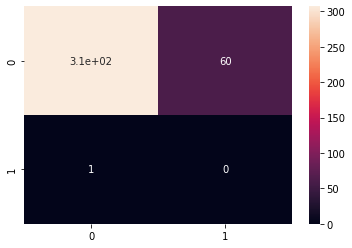

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predlrm, y_test)))

cm = confusion_matrix(y_predlrm, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predlrm))

## **Support Vector Machine(SVM) Model**

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   mac

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


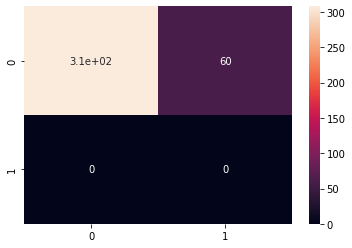

In [17]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
y_predsvc=svcmodel.predict(X_test)
print(svcmodel.predict(X_test))
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predsvc, y_test)))
cm = confusion_matrix(y_predsvc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predsvc))

## **Bagging Classifier Model**

Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.70      0.84      0.76       368



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


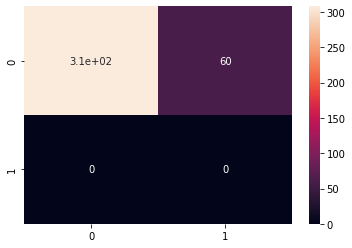

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bcmodel = BaggingClassifier(SVC()).fit(X_train, y_train)
bcmodel.predict(X_test)
y_predbc=bcmodel.predict(X_test)
y_predbc
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predbc, y_test)))
cm = confusion_matrix(y_predbc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predbc))

## **K-Nearest Neighbor(KNN) Model**

Accuracy 83.69565217391305 %
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       308
           1       0.00      0.00      0.00        60

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.70      0.84      0.76       368



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


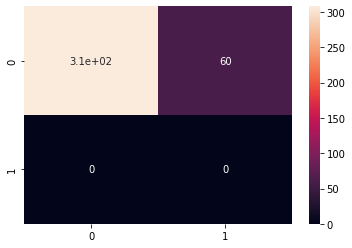

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.predict(X_test)
y_predknn=bcmodel.predict(X_test)
y_predknn
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predknn, y_test)))
cm = confusion_matrix(y_predknn, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predknn))

## **Random Forest Classifier Model**



              precision    recall  f1-score   support

           0       0.86      0.99      0.92       308
           1       0.80      0.20      0.32        60

    accuracy                           0.86       368
   macro avg       0.83      0.60      0.62       368
weighted avg       0.85      0.86      0.82       368



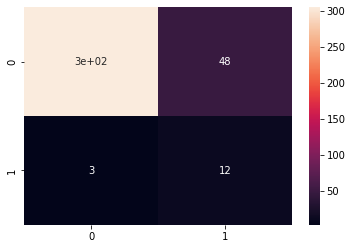

In [20]:
from sklearn.ensemble import RandomForestClassifier

rcmodel = RandomForestClassifier()
rcmodel.fit(X_train, y_train)

y_predrc = rcmodel.predict(X_test)
y_predrc

# Testing Set Performance
cm = confusion_matrix(y_predrc, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predrc))

## **Xgboost Classifier Model**

Accuracy 86.68478260869566 %
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       308
           1       0.72      0.30      0.42        60

    accuracy                           0.87       368
   macro avg       0.80      0.64      0.67       368
weighted avg       0.85      0.87      0.84       368



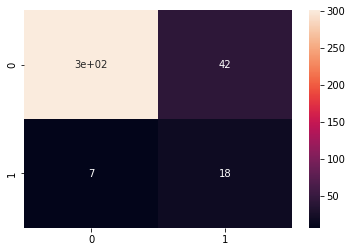

In [21]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_predxgb=xgbmodel.predict(X_test)
y_predxgb
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predxgb, y_test)))
cm = confusion_matrix(y_predxgb, y_test)

sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predxgb))

## **Gradient Boosting Classifier Model**

Accuracy 86.68478260869566 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       308
           1       0.70      0.32      0.44        60

    accuracy                           0.87       368
   macro avg       0.79      0.65      0.68       368
weighted avg       0.85      0.87      0.84       368



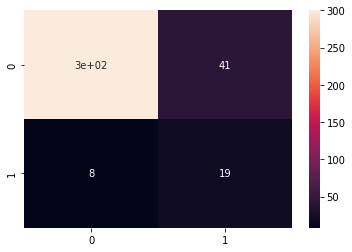

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train, y_train)
y_predgb=gbmodel.predict(X_test)
y_predgb
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_predgb, y_test)))
cm = confusion_matrix(y_predgb, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predgb))

In [23]:
models = []
models.append(('Logistic Regression',logisticregressionmodel))
models.append(('Random Forest', rcmodel))
models.append(('SVM', svcmodel))
models.append(('KNN', neigh))
models.append(('bc model',bcmodel))
models.append(('Xgboost',xgbmodel))
models.append(('gboost',gbmodel))

In [24]:
acc_results = []
names = []
col = ['Algorithm','Accuracy mean']
df_results = pd.DataFrame(columns=col)

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = KFold(
        n_splits=10, shuffle=True,random_state=7)  # 10-fold cross-validation

    cv_acc_results =cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')


    acc_results.append(cv_acc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_acc_results.mean()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Accuracy mean'], ascending=False)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,Algorithm,Accuracy mean
6,gboost,85.93
5,Xgboost,85.75
1,Random Forest,85.48
0,Logistic Regression,84.21
2,SVM,83.94
4,bc model,83.94
3,KNN,80.13


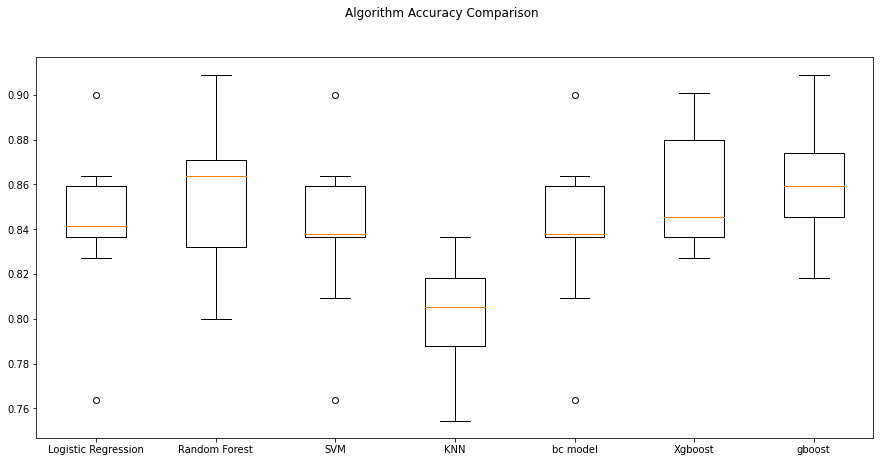

In [26]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

In [27]:
max=0
model
df=df_results
model_name=""
for i in range(len(df)):
    if(df.loc[i, "Accuracy mean"]>max):
        max=df.loc[i, "Accuracy mean"]
        model=df.loc[i, "Algorithm"]
print("The best prediction model with highest accuracy is:",model,"with accuracy:",max)

The best prediction model with highest accuracy is: gboost with accuracy: 85.93
